# Network Slicing in 5G

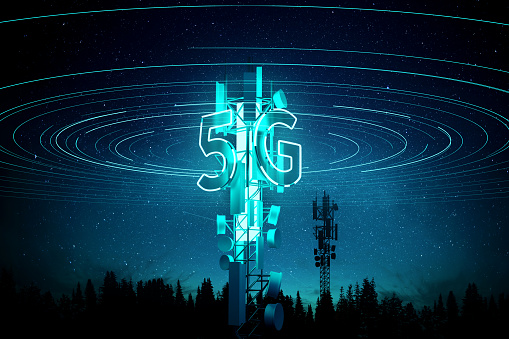

# About Dataset



> **Dataset Description**

> LTE/5g - User Equipment categories or classes to define the performance specifications

> Packet Loss Rate - number of packets not received divided by the total number of packets sent.

> Packet Delay - The time for a packet to be received.

> Slice type - network configuration that allows multiple networks (virtualized and independent)

> GBR - Guaranteed Bit Rate

> Healthcare - Usage in Healthcare (1 or 0)

> Industry 4.0 - Usage in Digital Enterprises(1 or 0)

> IoT Devices - Usage

> Public Safety - Usage for public welfare and safety purposes (1 or 0)

> Smart City & Home - usage in daily household chores

> Smart Transportation - usage in public transportation
> Smartphone - whether used for smartphone cellular data



# Importing Necessary Libraries

In [139]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model
from sklearn.model_selection import TimeSeriesSplit
from sklearn.svm import SVR
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/5g-dataset/5G_Dataset.csv


# Loading the Dataset

In [140]:
df_final = pd.read_csv("/kaggle/input/5g-dataset/5G_Dataset.csv",na_values=['null'])

In [141]:
df_final.head()

,User Device Type,Duration(sec),Paket Loss Rate(Reliability),Packet Delay Budget( Latency(ms)),Bandwidth(GHz),Delay Rate(Mbps),Speed(Mbps),Jitter(ps),Modulation Type,Slice Type
0,SmartPhone,600,0.010000,50,30,17500,1082,43000000.0,FBMC,eMBB
1,SmartPhone,100,0.010000,7,38,1700,2647,45000000.0,FBMC,eMBB
2,SmartPhone,240,0.000010,46,38,900,2821,65000000.0,FBMC,eMBB
3,SmartPhone,120,0.000100,12,50,900,864,77000000.0,FBMC,eMBB
4,SmartPhone,60,0.000001,49,60,1700,1945,33000000.0,FBMC,eMBB


In [142]:
df_final.shape

(3000, 10)

## So we have 3000 records and 10 columns including the Slice Type which is our Target Variable

In [143]:
df_final.describe()

,Duration(sec),Paket Loss Rate(Reliability),Packet Delay Budget( Latency(ms)),Bandwidth(GHz),Delay Rate(Mbps),Speed(Mbps),Jitter(ps)
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03
mean,241.673333,0.004496,29.855333,41.584333,4691.866667,1533.408333,3.883700e+07
std,179.922550,0.004917,13.656399,9.332412,5569.961281,846.788300,2.213678e+07
min,60.000000,0.000001,1.000000,29.000000,300.000000,51.000000,7.500000e+06
25%,100.000000,0.000010,20.000000,36.000000,900.000000,800.750000,1.900000e+07
50%,210.000000,0.000100,28.000000,40.000000,1350.000000,1550.500000,3.700000e+07
75%,300.000000,0.010000,40.000000,50.000000,10125.000000,2250.250000,4.500000e+07
max,600.000000,0.010000,50.000000,60.000000,17500.000000,3000.000000,7.700000e+07


## Checking for Missing Values

In [144]:
df_final.isnull().values.any()

False

## That's Great we dont have any Missing Values in Our Dataset

In [145]:
df_final.dtypes

User Device Type                      object
Duration(sec)                          int64
Paket Loss Rate(Reliability)         float64
Packet Delay Budget( Latency(ms))      int64
Bandwidth(GHz)                         int64
Delay Rate(Mbps)                       int64
Speed(Mbps)                            int64
Jitter(ps)                           float64
Modulation Type                       object
Slice Type                            object
dtype: object

In [146]:
df_final['Slice Type'].value_counts()

Slice Type
URLLC    1299
mMTC     1070
eMBB      631
Name: count, dtype: int64

<Axes: xlabel='Paket Loss Rate(Reliability)', ylabel='Slice Type'>

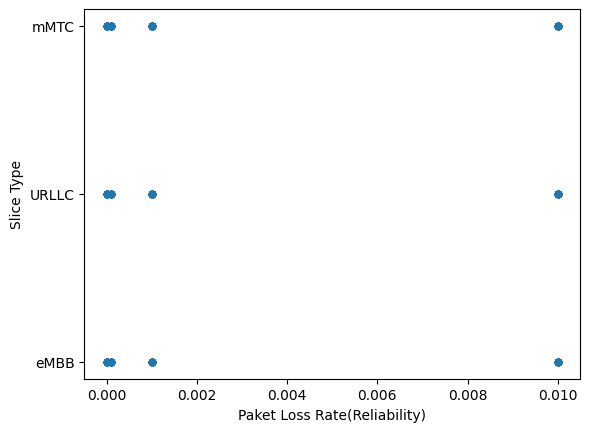

In [147]:
df_final.plot(kind = 'scatter', x = 'Paket Loss Rate(Reliability)' , y = 'Slice Type'  )

<Axes: xlabel='Packet Delay Budget( Latency(ms))', ylabel='Slice Type'>

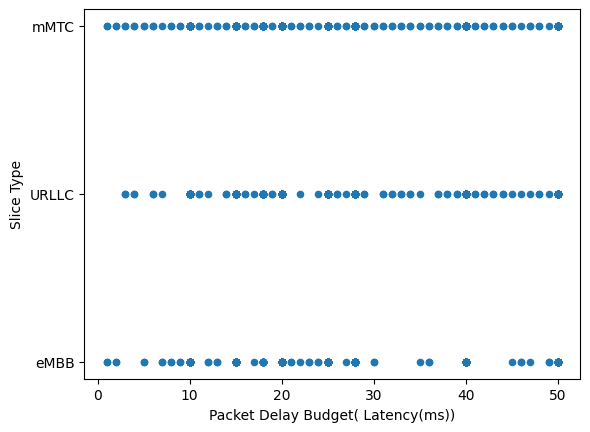

In [72]:
df_final.plot(kind = 'scatter', x = 'Packet Delay Budget( Latency(ms))' , y = 'Slice Type'  )

<Axes: xlabel='Bandwidth(GHz)', ylabel='Slice Type'>

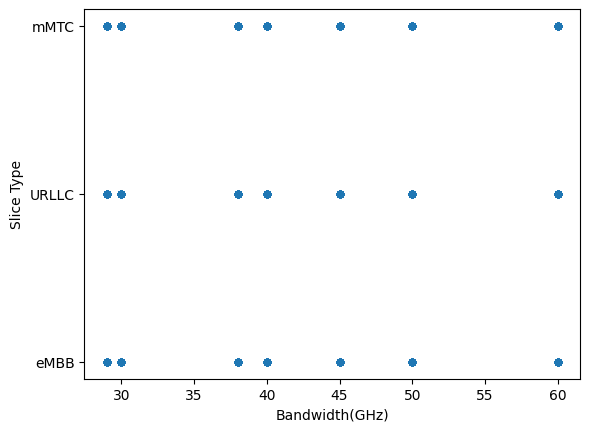

In [73]:
df_final.plot(kind = 'scatter', x = 'Bandwidth(GHz)' , y = 'Slice Type'  )

<Axes: xlabel='Delay Rate(Mbps)', ylabel='Slice Type'>

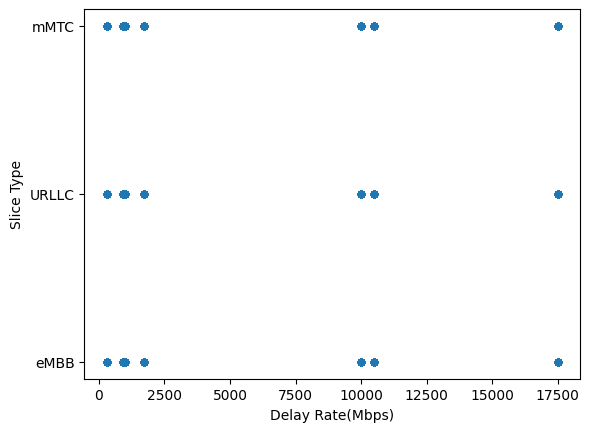

In [74]:
df_final.plot(kind = 'scatter', x = 'Delay Rate(Mbps)' , y = 'Slice Type'  )

<Axes: xlabel='Speed(Mbps)', ylabel='Slice Type'>

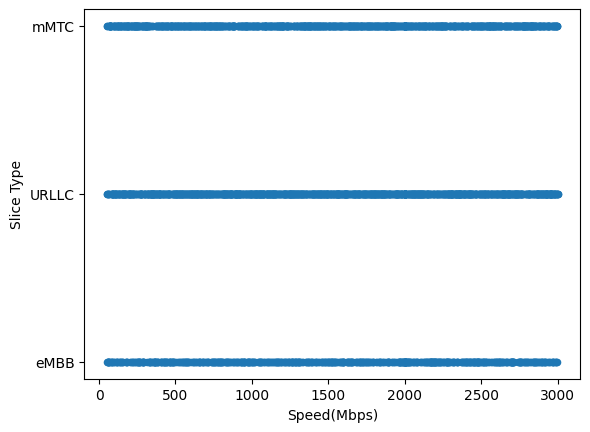

In [75]:
df_final.plot(kind = 'scatter', x = 'Speed(Mbps)' , y = 'Slice Type'  )

<Axes: xlabel='Jitter(ps)', ylabel='Slice Type'>

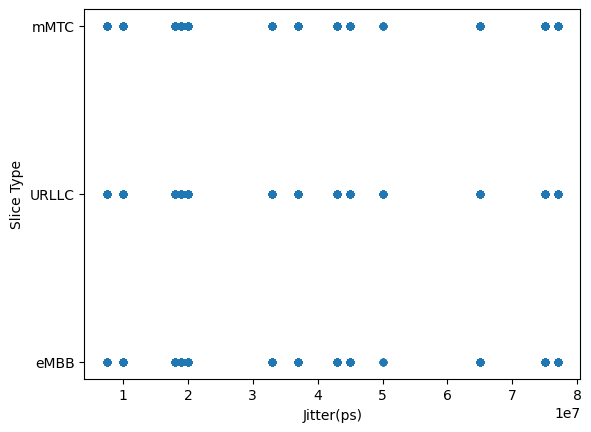

In [76]:
df_final.plot(kind = 'scatter', x = 'Jitter(ps)' , y = 'Slice Type'  )

<Axes: xlabel='Modulation Type', ylabel='Slice Type'>

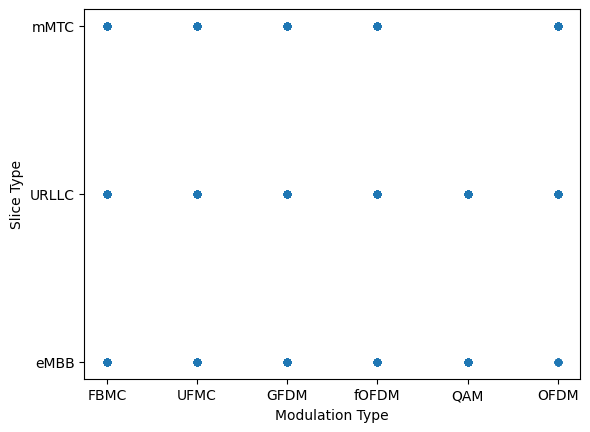

In [77]:
df_final.plot(kind = 'scatter', x = 'Modulation Type' , y = 'Slice Type'  )

<Axes: xlabel='Duration(sec)', ylabel='Slice Type'>

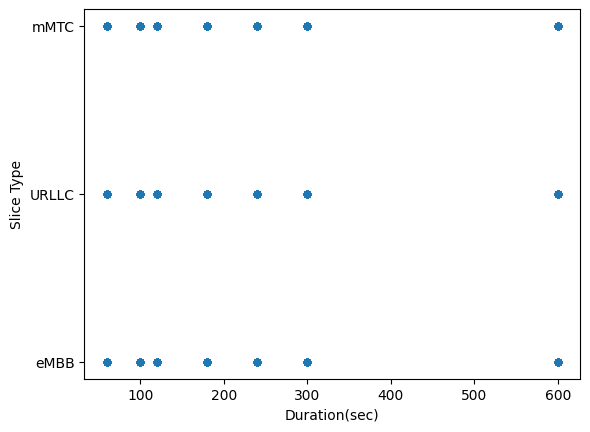

In [78]:
df_final.plot(kind = 'scatter', x = 'Duration(sec)' , y = 'Slice Type'  )

<Axes: xlabel='User Device Type', ylabel='Slice Type'>

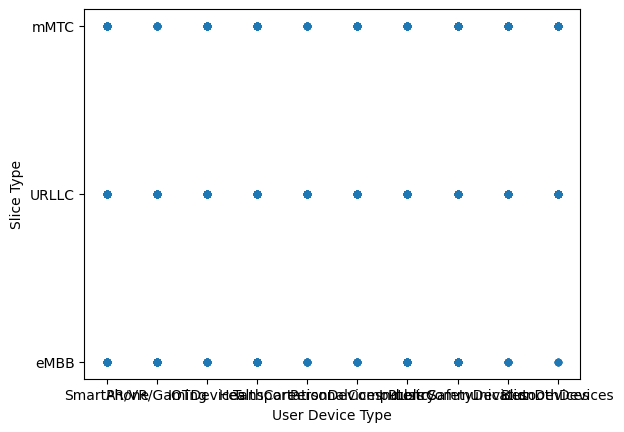

In [79]:
df_final.plot(kind = 'scatter', x = 'User Device Type' , y = 'Slice Type'  )

In [148]:
df_final.rename(
    columns={"User Device Type": "UserDeviceType", "Paket Loss Rate(Reliability)": "PacketLossRate", "Packet Delay Budget( Latency(ms))": "Latency","Bandwidth(GHz)":"Bandwidth","Delay Rate(Mbps)":"DelayRate","Speed(Mbps)":"Speed","Jitter(ps)":"Jitter","Modulation Type":"ModulationType","Slice Type":"SliceType"},
    inplace=True,
)


In [149]:
df_final["SliceType"].unique()

array(['eMBB', 'URLLC', 'mMTC'], dtype=object)

## We have 3 Types of Slices

In [82]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Encode labels in column 'SliceType'.
df_final['SliceType']= label_encoder.fit_transform(df_final["SliceType"])

In [83]:
df_final.head()

,UserDeviceType,Duration(sec),PacketLossRate,Latency,Bandwidth,DelayRate,Speed,Jitter,ModulationType,SliceType
0,SmartPhone,600,0.010000,50,30,17500,1082,43000000.0,FBMC,1
1,SmartPhone,100,0.010000,7,38,1700,2647,45000000.0,FBMC,1
2,SmartPhone,240,0.000010,46,38,900,2821,65000000.0,FBMC,1
3,SmartPhone,120,0.000100,12,50,900,864,77000000.0,FBMC,1
4,SmartPhone,60,0.000001,49,60,1700,1945,33000000.0,FBMC,1


In [84]:
# Import label encoder
#from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
#label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'SliceType'.
#df_final['SliceType']= label_encoder.fit_transform(df_final["SliceType"])
#df_final['UserDeviceType']= label_encoder.fit_transform(df_final["UserDeviceType"])
#df_final['ModulationType']= label_encoder.fit_transform(df_final["ModulationType"])

In [85]:
#df_final.head()

In [86]:

df_final["SliceType"].unique()

array([1, 0, 2])

In [87]:

df_final['SliceType'].value_counts()

SliceType
0    1299
2    1070
1     631
Name: count, dtype: int64

In [88]:
df_final["UserDeviceType"].value_counts()

UserDeviceType
HealthCare              590
Industry                525
SmartPhone              499
IOTDevices              429
PublicSafetyDevices     291
CommunicationDevices    172
AR/VR/Gaming            146
BlutoothDevices         130
PersonalComputers       127
TansportationDevices     91
Name: count, dtype: int64

In [89]:
df_final["UserDeviceType"].nunique()

10

In [90]:
df_final["ModulationType"].value_counts()

ModulationType
FBMC     811
UFMC     603
GFDM     540
fOFDM    438
QAM      380
OFDM     228
Name: count, dtype: int64

In [91]:
df_final["ModulationType"].nunique()

6

## One Hot Encoding on UserDeviceType and ModulationType

In [92]:
#pd.get_dummies(df_final,columns=["UserDeviceType","ModulationType"])

In [93]:
df_final.dtypes

UserDeviceType     object
Duration(sec)       int64
PacketLossRate    float64
Latency             int64
Bandwidth           int64
DelayRate           int64
Speed               int64
Jitter            float64
ModulationType     object
SliceType           int64
dtype: object

## One Hot Encoding Using Sk Learn****

In [94]:
from sklearn.preprocessing import OneHotEncoder

In [95]:
OHE =OneHotEncoder(sparse=False,dtype= np.int32)


In [96]:
df_final_new = OHE.fit_transform(df_final[["UserDeviceType","ModulationType"]])

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [97]:
df_final_new

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int32)

In [98]:
np.hstack((df_final[[ 'Duration(sec)', 'PacketLossRate', 'Latency',
       'Bandwidth', 'DelayRate', 'Speed', 'Jitter',
       'SliceType']].values,df_final_new)).shape

(3000, 24)

In [99]:
from sklearn.compose import ColumnTransformer

In [100]:
transformer = ColumnTransformer(transformers=[('transformer1',OneHotEncoder(sparse= False,drop='first'),['UserDeviceType','ModulationType'])],remainder='passthrough')


In [101]:
df =transformer.fit_transform(df_final).shape

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [102]:
df_final.head()

,UserDeviceType,Duration(sec),PacketLossRate,Latency,Bandwidth,DelayRate,Speed,Jitter,ModulationType,SliceType
0,SmartPhone,600,0.010000,50,30,17500,1082,43000000.0,FBMC,1
1,SmartPhone,100,0.010000,7,38,1700,2647,45000000.0,FBMC,1
2,SmartPhone,240,0.000010,46,38,900,2821,65000000.0,FBMC,1
3,SmartPhone,120,0.000100,12,50,900,864,77000000.0,FBMC,1
4,SmartPhone,60,0.000001,49,60,1700,1945,33000000.0,FBMC,1


In [150]:
# convert SliceType column to numeric
df_final['SliceType'] = df_final['SliceType'].map({'eMBB':1, 'URLLC':2, 'mMTC':3})

In [151]:
#Converting UserDevicType Column to numeric
df_final['UserDeviceType']= df_final['UserDeviceType'].map({'SmartPhone': 1, 'AR/VR/Gaming': 2, 'IOTDevices': 3, 'HealthCare': 4,
       'TansportationDevices': 5, 'PersonalComputers': 6, 'Industry': 7,
       'PublicSafetyDevices':8, 'CommunicationDevices':9, 'BlutoothDevices':10})

In [152]:
# converting ModulationType column to numeric
df_final['ModulationType']= df_final['ModulationType'].map({'FBMC': 1, 'UFMC': 2, 'GFDM': 3, 'fOFDM': 4, 'QAM': 5, 'OFDM': 6})

## Statistical Measures (Mean, Standard deviation, Kurtosis)

**Kurtosis** is a statistical measure that is used to describe the distribution. Whereas skewness differentiates extreme values in one versus the other tail, kurtosis measures extreme values in either tail. Distributions with large kurtosis exhibit tail data exceeding the tails of the normal distribution (e.g., five or more standard deviations from the mean). Distributions with low kurtosis exhibit tail data that is generally less extreme than the tails of the normal distribution.


For investors, high kurtosis of the return distribution implies that the investor will experience occasional extreme returns (either positive or negative), more extreme than the usual + or - three standard deviations from the mean that is predicted by the normal distribution of returns. This phenomenon is known as **kurtosis risk**.

**Positive Kurtosis**
More weights in the tail



**Negative Kurtosis**
It has as much data in each tail as it does in the peak.



Mean= 2.146333333333333
Standard Deviation= 0.7387614489005789
Kurtosis= -1.14271676317883


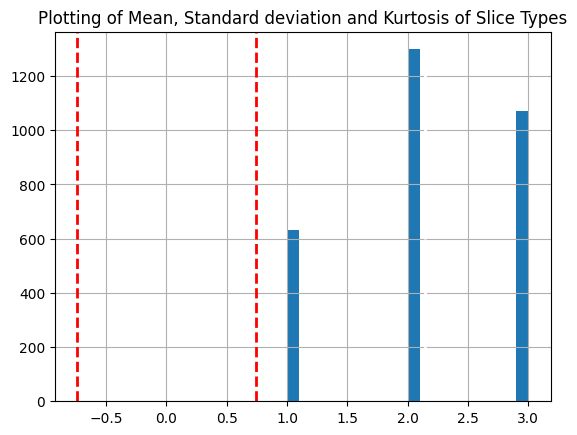

In [153]:
# computing mean,standard deviation and kurtosis of Slice Types

mean=df_final['SliceType'].mean()
# computing standard deviation of Gold stock
std=df_final['SliceType'].std()
kurt=df_final['SliceType'].kurtosis()
print('Mean=',mean)
print('Standard Deviation=',std)
print('Kurtosis=',kurt)
#Plotting Histogram
df_final['SliceType'].hist(bins=20)

plt.axvline(mean, color='w',linestyle='dashed',linewidth=2)
plt.axvline(std, color='r',linestyle='dashed',linewidth=2)
plt.axvline(-std, color='r',linestyle='dashed',linewidth=2)
plt.title("Plotting of Mean, Standard deviation and Kurtosis of Slice Types")
plt.show()

Mean= 0.004495819000000001
Standard Deviation= 0.004917385058495031
Kurtosis= -1.9452616080717577


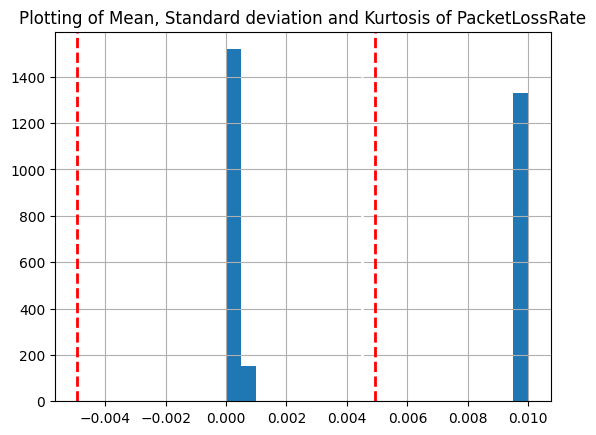

In [154]:
# computing mean,standard deviation and kurtosis of PacketLossRate

mean=df_final['PacketLossRate'].mean()
# computing standard deviation of Gold stock
std=df_final['PacketLossRate'].std()
kurt=df_final['PacketLossRate'].kurtosis()
print('Mean=',mean)
print('Standard Deviation=',std)
print('Kurtosis=',kurt)
#Plotting Histogram
df_final['PacketLossRate'].hist(bins=20)

plt.axvline(mean, color='w',linestyle='dashed',linewidth=2)
plt.axvline(std, color='r',linestyle='dashed',linewidth=2)
plt.axvline(-std, color='r',linestyle='dashed',linewidth=2)
plt.title("Plotting of Mean, Standard deviation and Kurtosis of PacketLossRate")
plt.show()

Mean= 29.855333333333334
Standard Deviation= 13.656399133787891
Kurtosis= -1.234394788374038


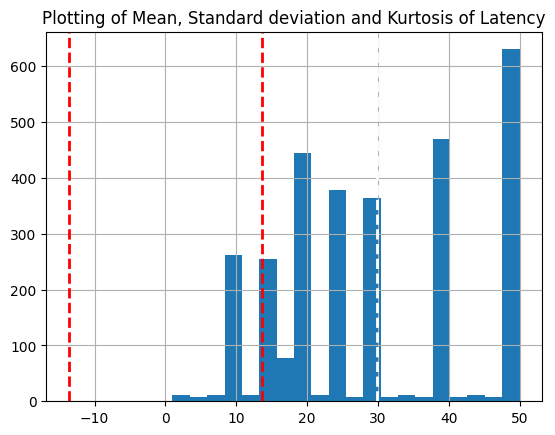

In [155]:
# computing mean,standard deviation and kurtosis of Latency

mean=df_final['Latency'].mean()
# computing standard deviation of Gold stock
std=df_final['Latency'].std()
kurt=df_final['Latency'].kurtosis()
print('Mean=',mean)
print('Standard Deviation=',std)
print('Kurtosis=',kurt)
#Plotting Histogram
df_final['Latency'].hist(bins=20)

plt.axvline(mean, color='w',linestyle='dashed',linewidth=2)
plt.axvline(std, color='r',linestyle='dashed',linewidth=2)
plt.axvline(-std, color='r',linestyle='dashed',linewidth=2)
plt.title("Plotting of Mean, Standard deviation and Kurtosis of Latency")
plt.show()

## Correlation Analysis

<Axes: >

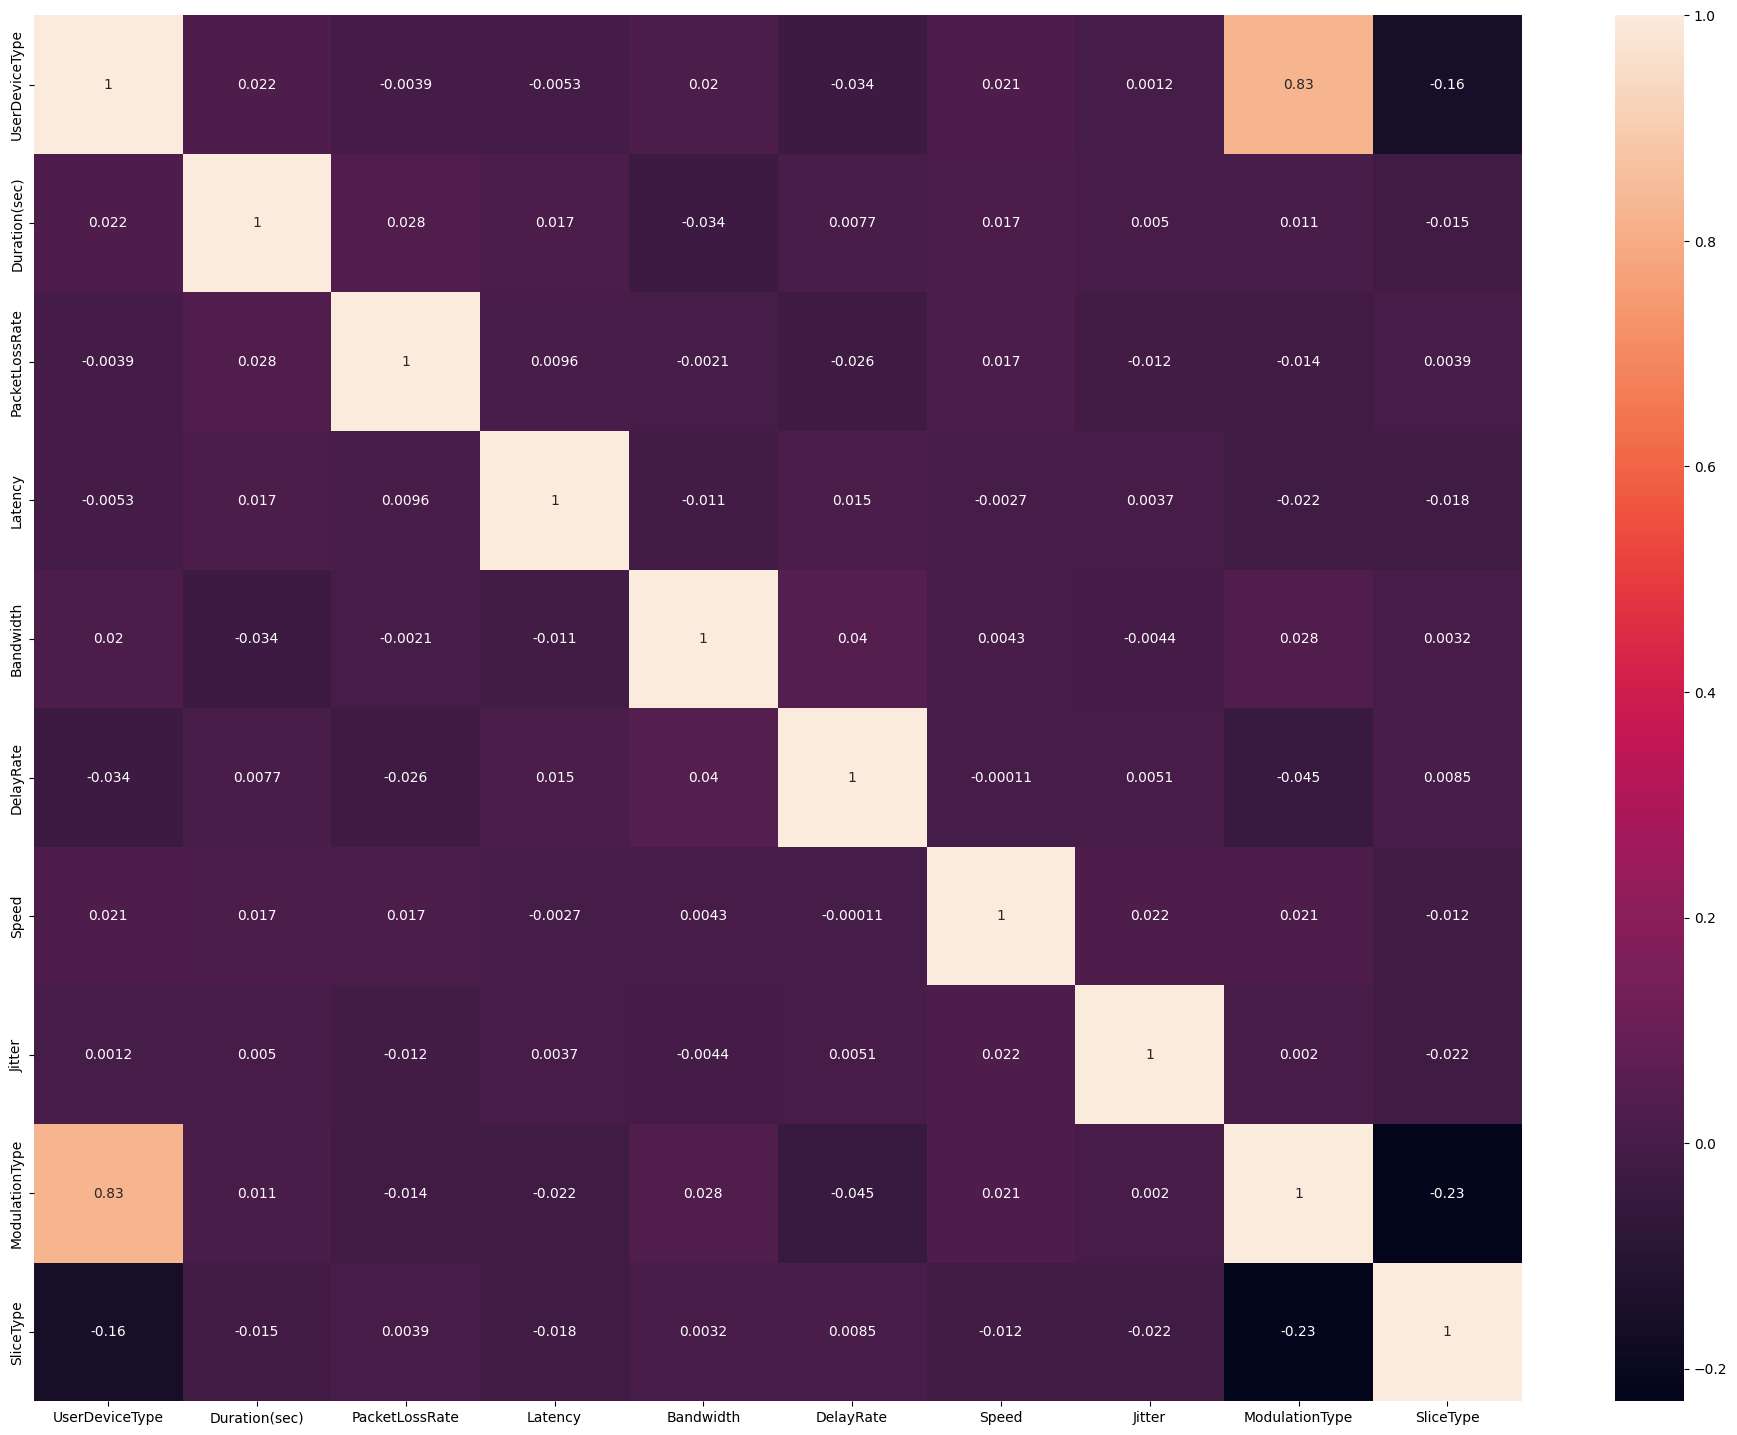

In [156]:
plt.figure(figsize=(24,18)) 
sns.heatmap(df_final.corr(), annot=True) 

In [157]:
X=df_final.drop(['SliceType'],axis=1)


<Axes: title={'center': 'Correlation with slice type'}>

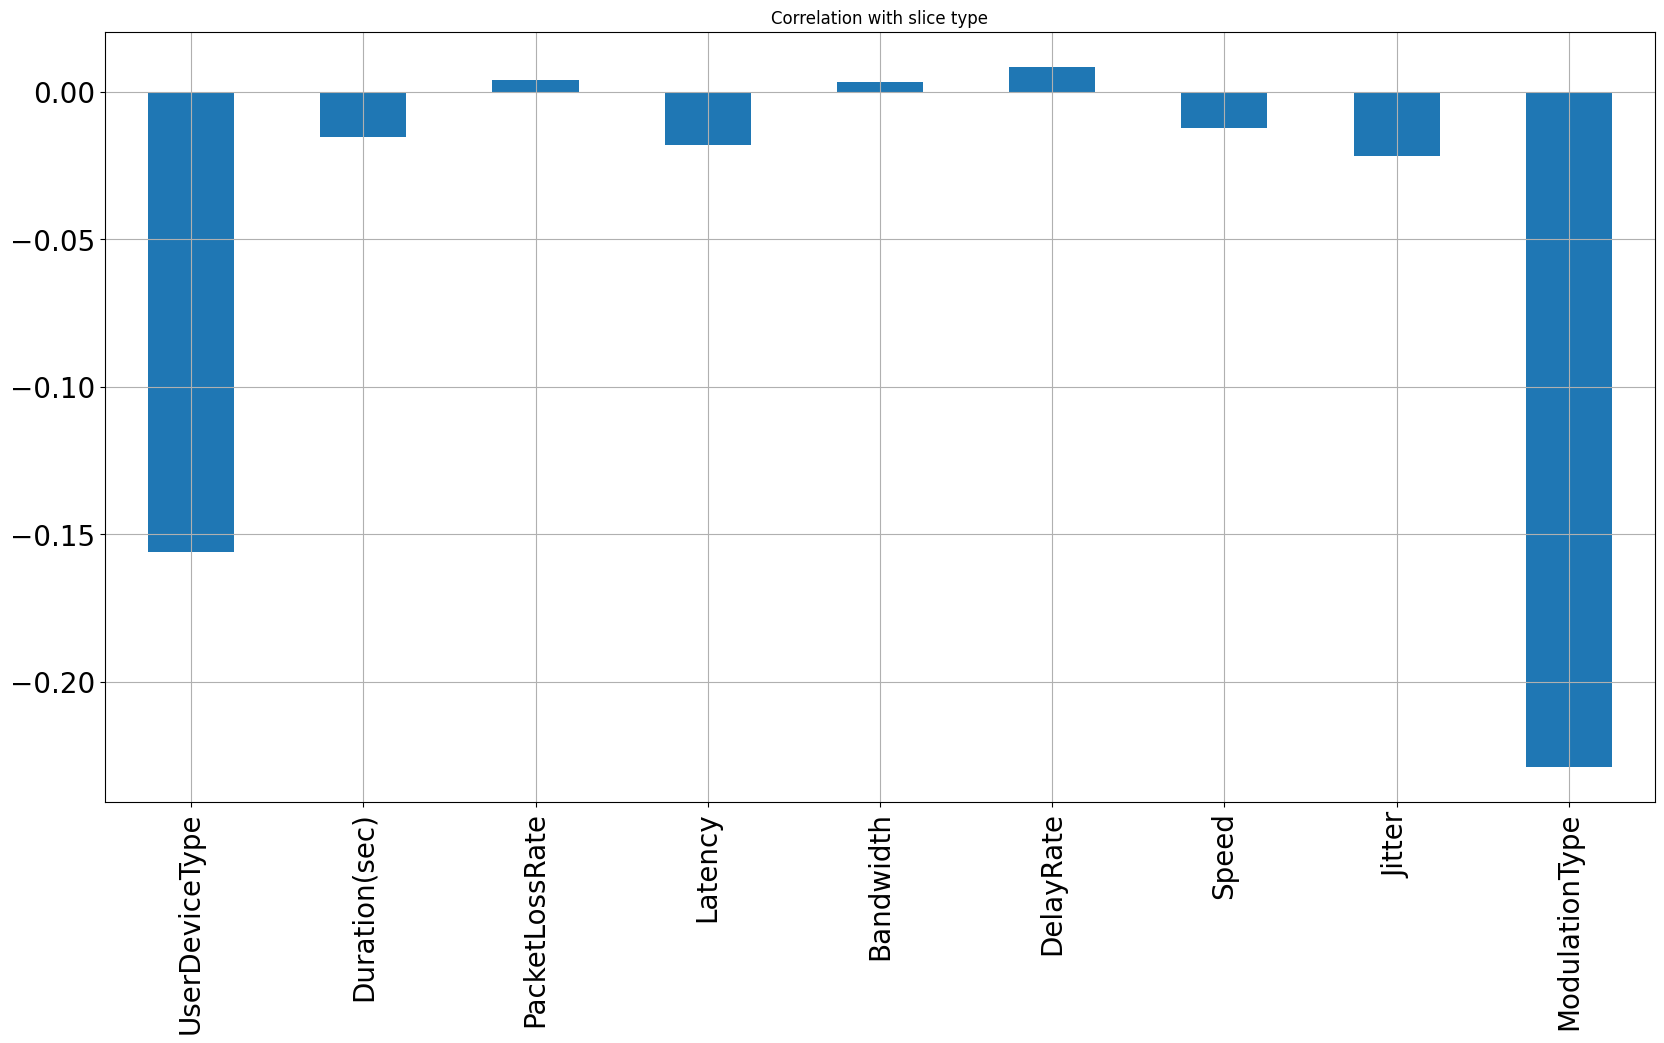

In [158]:
X.corrwith(df_final['SliceType']).plot.bar(
        figsize = (20, 10), title = "Correlation with slice type", fontsize = 20,
        rot = 90, grid = True)

In [159]:
corr_matrix=df_final.corr()
coef=corr_matrix["SliceType"].sort_values(ascending=False)

### Positively Correlated Variables

In [160]:
pos_corr=coef[coef>0]
pos_corr

SliceType         1.000000
DelayRate         0.008490
PacketLossRate    0.003920
Bandwidth         0.003215
Name: SliceType, dtype: float64

### Negatively Correlated Variables

In [161]:
pos_corr=coef[coef<0]
pos_corr

Speed            -0.012131
Duration(sec)    -0.015339
Latency          -0.017897
Jitter           -0.021928
UserDeviceType   -0.156123
ModulationType   -0.228901
Name: SliceType, dtype: float64

## Technical Indicators

I will also use following technical indicators which I feel it will be helpful as a feature for prediction of Slice Type

**1. MACD :** The moving average convergence-divergence (MACD) is one of the most powerful and well-known indicators in technical analysis. The indicator is comprised of two exponential moving averages that help measure momentum in a security. The MACD is simply the difference between these two moving averages plotted against a centerline, where the centerline is the point at which the two moving averages are equal.

**2. RSI :** The relative strength index (RSI) is another well known momentum indicators that’s widely used in technical analysis. The indicator is commonly used to identify overbought and oversold conditions in a security with a range between 0 (oversold) and 100 (overbought).

**3. Simple Moving Average (SMA) :** simply takes the sum of all of the past closing prices over a time period and divides the result by the total number of prices used in the calculation. For example, a 10-day simple moving average takes the last ten closing prices and divides them by ten.

**4. Upper Band**

**5. Lower Band**

**6. DIFF**

**7. Open-Close**

**8. High-Low**

In [162]:
def calculate_MACD(df, nslow=26, nfast=12):
    emaslow = df.ewm(span=nslow, min_periods=nslow, adjust=True, ignore_na=False).mean()
    emafast = df.ewm(span=nfast, min_periods=nfast, adjust=True, ignore_na=False).mean()
    dif = emafast - emaslow
    MACD = dif.ewm(span=9, min_periods=9, adjust=True, ignore_na=False).mean()
    return dif, MACD

def calculate_RSI(df, periods=14):
    # wilder's RSI
    delta = df.diff()
    up, down = delta.copy(), delta.copy()

    up[up < 0] = 0
    down[down > 0] = 0

    rUp = up.ewm(com=periods,adjust=False).mean()
    rDown = down.ewm(com=periods, adjust=False).mean().abs()

    rsi = 100 - 100 / (1 + rUp / rDown)
    return rsi

def calculate_SMA(df, peroids=15):
    SMA = df.rolling(window=peroids, min_periods=peroids, center=False).mean()
    return SMA

def calculate_BB(df, peroids=15):
    STD = df.rolling(window=peroids,min_periods=peroids, center=False).std()
    SMA = calculate_SMA(df)
    upper_band = SMA + (2 * STD)
    lower_band = SMA - (2 * STD)
    return upper_band, lower_band

def calculate_stdev(df,periods=5):
    STDEV = df.rolling(periods).std()
    return STDEV

## Plotting Technical indicators

In [163]:
def calculate_MACD(df, nslow=26, nfast=12):
    emaslow = df.ewm(span=nslow, min_periods=nslow, adjust=True, ignore_na=False).mean()
    emafast = df.ewm(span=nfast, min_periods=nfast, adjust=True, ignore_na=False).mean()
    dif = emafast - emaslow
    MACD = dif.ewm(span=9, min_periods=9, adjust=True, ignore_na=False).mean()
    return dif, MACD

def calculate_RSI(df, periods=14):
    # wilder's RSI
    delta = df.diff()
    up, down = delta.copy(), delta.copy()

    up[up < 0] = 0
    down[down > 0] = 0

    rUp = up.ewm(com=periods,adjust=False).mean()
    rDown = down.ewm(com=periods, adjust=False).mean().abs()

    rsi = 100 - 100 / (1 + rUp / rDown)
    return rsi

def calculate_SMA(df, peroids=15):
    SMA = df.rolling(window=peroids, min_periods=peroids, center=False).mean()
    return SMA

def calculate_BB(df, peroids=15):
    STD = df.rolling(window=peroids,min_periods=peroids, center=False).std()
    SMA = calculate_SMA(df)
    upper_band = SMA + (2 * STD)
    lower_band = SMA - (2 * STD)
    return upper_band, lower_band

def calculate_stdev(df,periods=5):
    STDEV = df.rolling(periods).std()
    return STDEV

In [164]:
df_final.columns

Index(['UserDeviceType', 'Duration(sec)', 'PacketLossRate', 'Latency',
       'Bandwidth', 'DelayRate', 'Speed', 'Jitter', 'ModulationType',
       'SliceType'],
      dtype='object')

In [165]:
# selecting Feature Columns
feature_columns =['UserDeviceType', 'Duration(sec)', 'PacketLossRate', 'Latency',
       'Bandwidth', 'DelayRate', 'Speed', 'Jitter', 'ModulationType']
SliceType = pd.DataFrame(df_final['SliceType'])

In [166]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', SliceType.shape)

# Shift target array because we want to predict the n + 1 day value


SliceType1 = SliceType.shift(-1)
validation_y = SliceType[-90:-1]
SliceType_close = SliceType[:-90]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', SliceType1.shape)
display(SliceType_close.tail())

,UserDeviceType,Duration(sec),PacketLossRate,Latency,Bandwidth,DelayRate,Speed,Jitter,ModulationType
0,0.0,1.000000,1.000000,1.000000,0.032258,1.000000,0.349610,0.510791,0.0
1,0.0,0.074074,1.000000,0.122449,0.290323,0.081395,0.880298,0.539568,0.0
2,0.0,0.333333,0.000900,0.918367,0.290323,0.034884,0.939301,0.827338,0.0
3,0.0,0.111111,0.009901,0.224490,0.677419,0.034884,0.275687,1.000000,0.0
4,0.0,0.000000,0.000000,0.979592,1.000000,0.081395,0.642252,0.366906,0.0


Shape of features :  (2910, 9)
Shape of target :  (3000, 1)


,UserDeviceType,Duration(sec),PacketLossRate,Latency,Bandwidth,DelayRate,Speed,Jitter,ModulationType
2904,1.0,0.000000,0.009901,0.387755,1.000000,0.034884,0.467277,0.165468,0.4
2905,1.0,0.222222,1.000000,1.000000,0.290323,0.034884,0.571380,0.165468,0.4
2906,1.0,0.111111,0.000900,0.795918,0.290323,0.563953,0.390980,0.151079,0.4
2907,1.0,0.111111,1.000000,1.000000,0.354839,0.034884,0.219396,0.539568,0.4
2908,1.0,0.000000,0.000000,0.285714,0.354839,0.034884,0.600203,0.179856,0.4


,SliceType
2994,3
2995,3
2996,3
2997,3
2998,3



 -----After process------ 

Shape of features :  (2820, 9)
Shape of target :  (3000, 1)


,SliceType
2905,2
2906,2
2907,2
2908,2
2909,2


## Train Test Split

In this step we would perform Train test split using sklearn's Timeseries split

In [167]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = SliceType[:len(train_index)].values.ravel(), SliceType[len(train_index): (len(train_index)+len(test_index))].values.ravel()
       

In [168]:
X_train.shape

(2564, 9)

In [122]:
X_test.shape

(264, 9)

In [123]:
y_train.shape

(2646,)

In [124]:
y_test.shape

(264,)

In [169]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

## Model Building

### 1. Benchmark Model :
       I'm Using Decision Tree Regressor with default parameter as my Benchmark model for the project.

RMSE:  0.6704015231539909
R2 score:  -0.9799777530589544


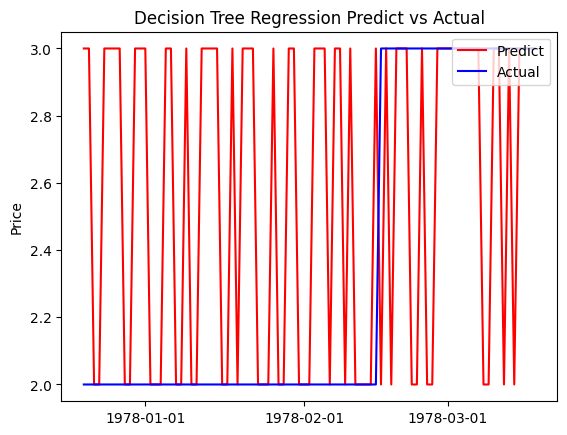

In [170]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

benchmark_dt=dt.fit(X_train, y_train)

validate_result(benchmark_dt, 'Decision Tree Regression')

## Solution Model 

### Support Vector Regressor (SVR)

RMSE:  0.44741101961574997
R2 score:  0.11813180713491378


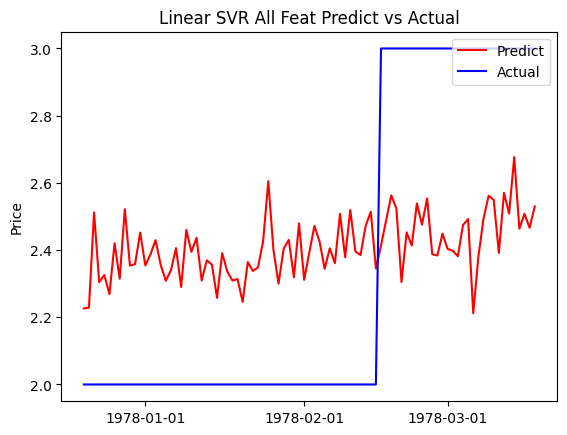

In [171]:
# Save all soultion models
solution_models = {}
# SVR with  linear Kernel
svr_lin = SVR(kernel='linear')
linear_svr_clf_feat = svr_lin.fit(X_train,y_train)
validate_result(linear_svr_clf_feat,'Linear SVR All Feat')


### Hyperparameter Tuning
In this step I will tune two parameters of SVR C and epsilon to see if the model shows any improvement.

RMSE:  0.4538307264855359
R2 score:  0.09264315768452425


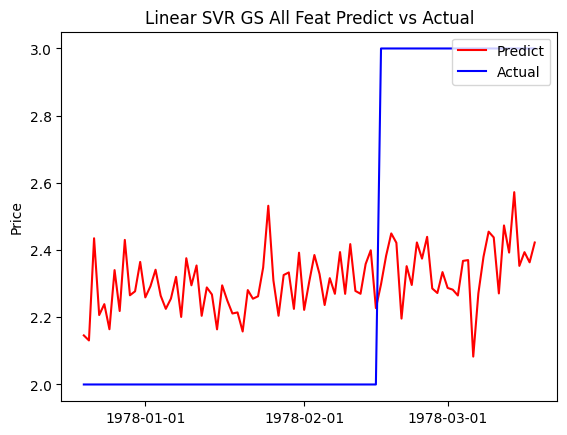

In [172]:
linear_svr_parameters = {
    'C':[0.5, 1.0, 10.0, 50.0],
    'epsilon':[0, 0.1, 0.5, 0.7, 0.9],
}

lsvr_grid_search_feat = GridSearchCV(estimator=linear_svr_clf_feat,
                           param_grid=linear_svr_parameters,
                           cv=ts_split,
)

lsvr_grid_search_feat.fit(X_train, y_train)

validate_result(lsvr_grid_search_feat,'Linear SVR GS All Feat')


As we have seen using gridsearch on SVR we get significant improvement in R2 score and RMSE also came down so we will save this as our first solution model 

In [173]:
solution_models['SVR All Feat'] = lsvr_grid_search_feat

## Solution Model : Random Forest

RMSE:  0.5044832710670561
R2 score:  -0.12120200222469424


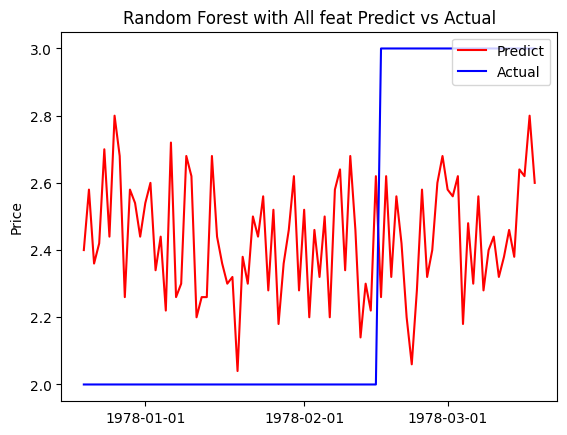

In [174]:
rf_cl = RandomForestRegressor(n_estimators=50, random_state=0)
random_forest_clf_feat = rf_cl.fit(X_train,y_train)
validate_result(random_forest_clf_feat,'Random Forest with All feat')

In [177]:
solution_models['Random_Forest with Feat'] = random_forest_clf_feat

## Solution Model : Lasso and Ridge

RMSE:  0.5974451286176823
R2 score:  -0.572484504903771


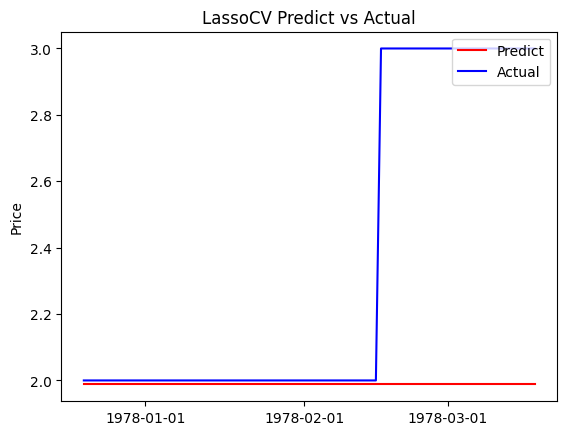

RMSE:  0.46948617961886024
R2 score:  0.02896261497802799


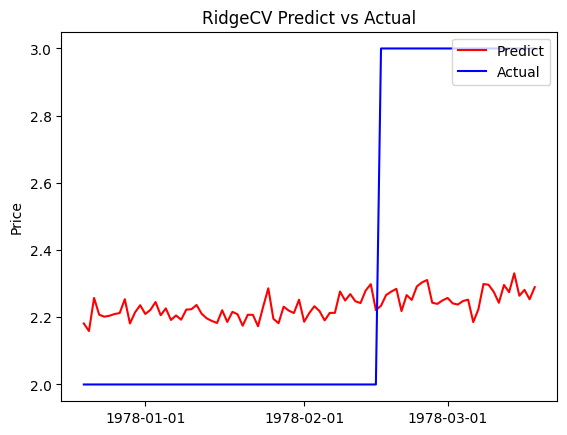

In [178]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

lasso_clf = LassoCV(n_alphas=1000, max_iter=3000, random_state=0)
ridge_clf = RidgeCV(gcv_mode='auto')

lasso_clf_feat = lasso_clf.fit(X_train,y_train)
validate_result(lasso_clf_feat,'LassoCV')
solution_models['LassoCV All feat'] = lasso_clf_feat

ridge_clf_feat = ridge_clf.fit(X_train,y_train)
validate_result(ridge_clf_feat,'RidgeCV')
solution_models['RidgeCV All Feat'] = ridge_clf_feat

## Solution Model : Bayesian Ridge

RMSE:  0.4996930370473938
R2 score:  -0.10001073015493156


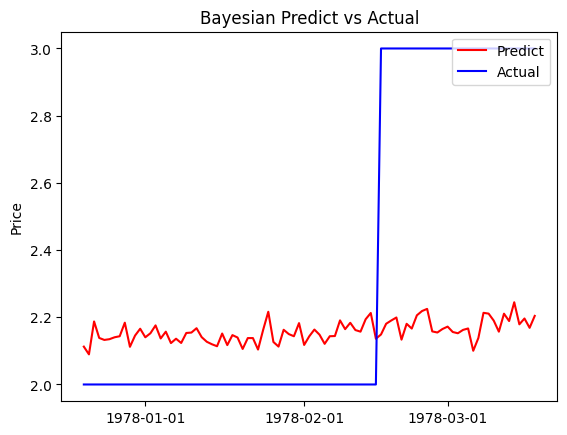

In [179]:
from sklearn import linear_model
bay = linear_model.BayesianRidge()
bay_feat = bay.fit(X_train,y_train)
validate_result(bay_feat,'Bayesian')
solution_models['Bay All Feat'] = bay_feat

## Solution Model : Stochastic Gradient Descent (SGD)

RMSE:  0.5875723915788912
R2 score:  -0.520943525502553


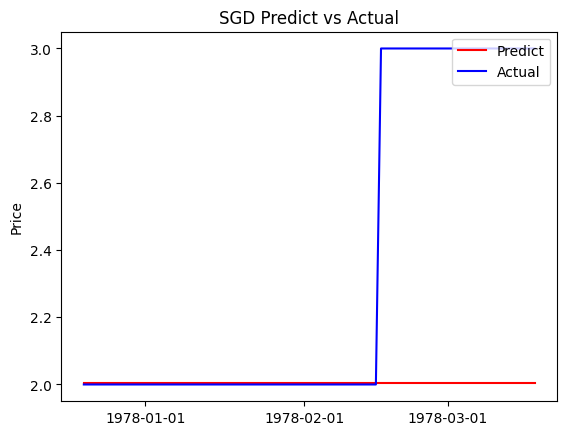

In [180]:
from sklearn.linear_model import SGDRegressor
sgd =SGDRegressor(max_iter=1000, tol=1e-3,loss='squared_epsilon_insensitive',penalty='l1',alpha=0.1)
sgd_feat = sgd.fit(X_train,y_train)
validate_result(sgd_feat,'SGD')
solution_models['SGD All Feat'] = sgd_feat

## Model Review
In this step, we will review benchmark model and all the solution model based on evaluation metrics i.e, RMSE and R2 score

### Comparison of RMSE of Benchmark and all Solution Models

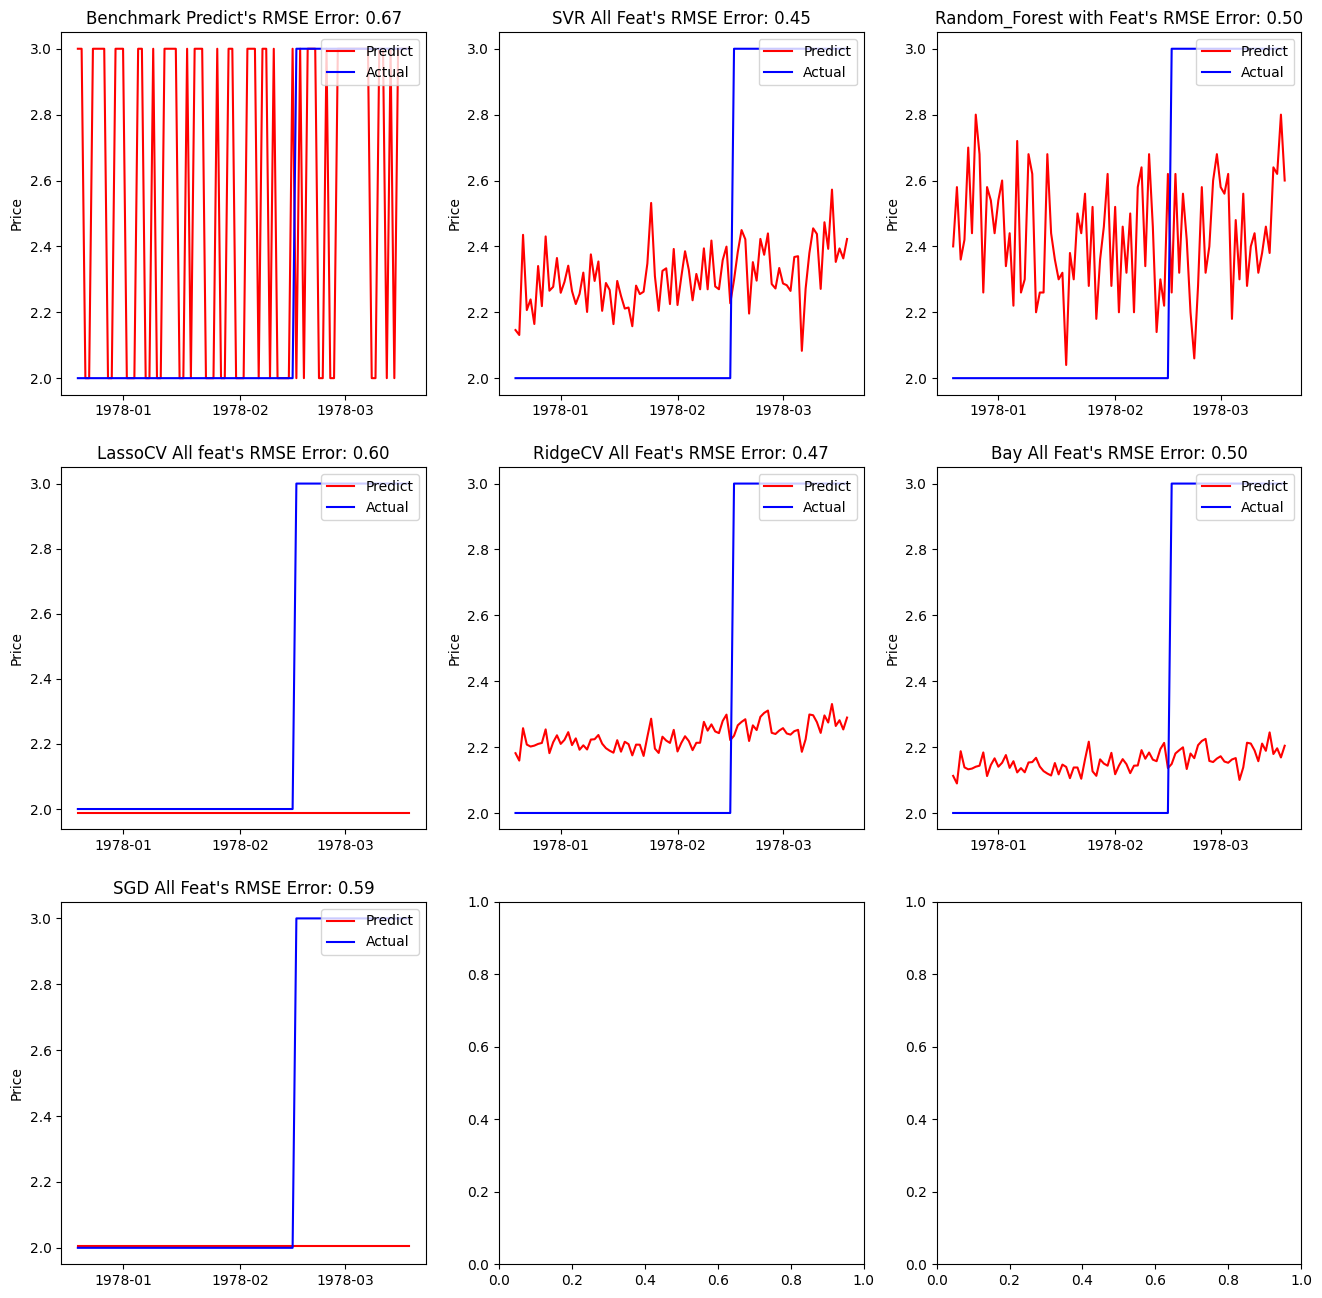

In [181]:
RMSE_scores = {}
def model_review(models):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))

    #plot benchmark model
    benchmark_predicted = benchmark_dt.predict(validation_X)
    benchmark_RSME_score = np.sqrt(mean_squared_error(validation_y, benchmark_predicted))
    RMSE_scores['Benchmark'] = benchmark_RSME_score
    
    axes[0,0].plot(validation_y.index, benchmark_predicted,'r', label='Predict')
    axes[0,0].plot(validation_y.index, validation_y,'b', label='Actual')
    axes[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    axes[0,0].xaxis.set_major_locator(mdates.MonthLocator())
    axes[0,0].set_ylabel('Price')
    axes[0,0].set_title("Benchmark Predict's RMSE Error: " +"{0:.2f}".format(benchmark_RSME_score))
    axes[0,0].legend(loc='upper right')
    
    #plot block
    ax_x = 0
    ax_y = 1
    #plot solution model
    for name, model in models.items():
        predicted = model.predict(validation_X)
        RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))

           
        axes[ax_x][ax_y].plot(validation_y.index, predicted,'r', label='Predict')
        axes[ax_x][ax_y].plot(validation_y.index, validation_y,'b', label='Actual')
        axes[ax_x][ax_y].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        axes[ax_x][ax_y].xaxis.set_major_locator(mdates.MonthLocator())
        axes[ax_x][ax_y].set_ylabel('Price')
        axes[ax_x][ax_y].set_title(name + "'s RMSE Error: " +"{0:.2f}".format(RSME_score))
        axes[ax_x][ax_y].legend(loc='upper right')
        RMSE_scores[name] = RSME_score
        if ax_x <=2:
            if ax_y < 2:
                ax_y += 1
            else:
                ax_x += 1
                ax_y = 0
    plt.show()

model_review(solution_models)